In [639]:
import pandas as pd
pandas.__version__
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [640]:
data = pd.read_csv('TakehomeAssignment/summer_internship_takehome.csv')
data2 = data

In [641]:
annual = pd.DataFrame(columns=['State', 'Owned', 'Profit margin'])
percent = pd.DataFrame(columns=['Profit margin %'])

In [642]:
for i in data.index:
    if i % 12 == 0:
        location_number = data.at[i, 'Location number']
        state = data.at[i, 'State']
        owned = data.at[i, 'Owned']
        revenue = data.at[i, 'Gross revenue']
        costs = (data.at[i, 'Fixed cost'] + data.at[i, 'Variable cost'] + data.at[i, 'Rental cost'])
    else:
        revenue += data.at[i, 'Gross revenue']
        costs += (data.at[i, 'Fixed cost'] + data.at[i, 'Variable cost'] + data.at[i, 'Rental cost'])
        if i % 12 == 11:
            profit_margin = (revenue - costs) / revenue
            annual = annual.append({'State': state, 'Owned': owned, 'Profit margin': profit_margin}, ignore_index=True)
            annual.sort_values(by=['Profit margin'], inplace = True)


        
        

In [643]:
total_profit = 0
for i in annual.index:
    profit = annual.at[i, 'Profit margin']
    total_profit += profit
    
mean_profit = (total_profit / len(annual))
mean_profit


0.24863229256707528

In [644]:
median_loc = ((len(annual) - 1) // 2)
median_loc
if median_loc % 1 != 0:
    median_loc1 = int(median_loc - .5)
    median_loc2 = int(median_loc +.5)
    median_profit = (annual.at[median_loc1, 'Profit margin'] + annual.at[median_loc2, 'Profit margin']) / 2
else:
    median_profit = annual.at[median_loc, 'Profit margin']
median_profit

0.26184928404393776

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127531110>]],
      dtype=object)

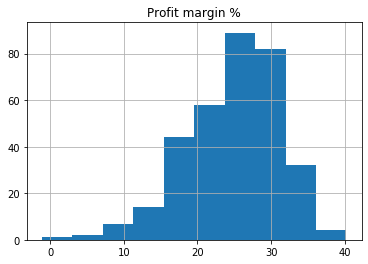

In [645]:
for i in annual.index:
    percent = percent.append({'Profit margin %': (annual.at[i, 'Profit margin']) * 100,}, ignore_index = True)
percent.hist()

    
    